<center>
    <h1>CSE4007 - Data Analytics</h1>
    <h3>Review Code Note Book</h3>
    <h4>Team3</h4>
    </center>
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h2>Loading Train,Test Data</h2>

In [2]:
data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

<center><h2>Pre-Processing, Preparing Data</h2></center>
<h4>Train data(first few)</h4>

In [3]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


<h4>Testing Data(First few)</h4>

In [4]:
test_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


<h4>Total null values</h4>

In [5]:
#data.isnull()  --> returns whether its a null value or not
#data.isnull().sum()  --> retruns sum of null values in each attribute

print("Total null values in training set",str(data.isnull().sum().sum()))
print("Total null values in test set",str(test_data.isnull().sum().sum()))

Total null values in training set 0
Total null values in test set 0


<h4>Data information</h4>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

<AxesSubplot:>

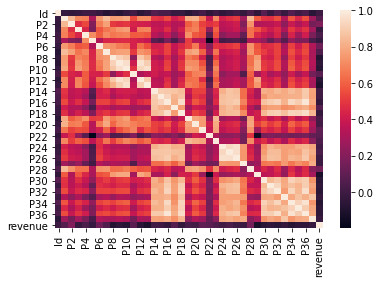

In [7]:
#Visual Summary

sns.heatmap(data.corr())

In [8]:
print("Total unique cities in the data\n",(data.City.value_counts))

Total unique cities in the data
 <bound method IndexOpsMixin.value_counts of 0        İstanbul
1          Ankara
2      Diyarbakır
3           Tokat
4       Gaziantep
          ...    
132       Trabzon
133         İzmir
134       Kayseri
135      İstanbul
136      İstanbul
Name: City, Length: 137, dtype: object>


Entries in City Group : ['Big Cities' 'Other']


<BarContainer object of 137 artists>

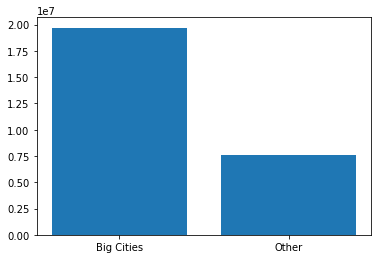

In [9]:
print("Entries in City Group :",data['City Group'].unique())
plt.bar(data['City Group'],data['revenue'])

<h4>Extracting fields in Dates</h4>

In [10]:
#Function to extract year
def year(x):
    rs = int(x[6:])
    return rs
def month(x):
    rs = int(x[:2])
    return rs
def day(x):
    rs = int(x[3:5])
    return rs

#Creating new Attributes to the existing data attributes

print("Dimensions before : ",str(data.shape))

data['year'] = data['Open Date'].apply(year)
data['month'] = data['Open Date'].apply(month)
data['day'] = data['Open Date'].apply(day)

print("Dimensions after : ",str(data.shape))

Dimensions before :  (137, 43)
Dimensions after :  (137, 46)


In [11]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,year,month,day
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,5,5,4,3,4,5653753.0,1999,7,17
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,6923131.0,2008,2,14
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,2055379.0,2013,3,9
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3,2,3,4,3,3,4316715.0,2009,5,9


In [12]:
#Counting the no.of days A restaurant had stayed opened

data['daysOpened'] = (pd.to_datetime('2021-10-10') - pd.to_datetime(data['Open Date'])).dt.days

#Removing unwanted attributes
data = data.drop('Type',axis=1)
data = data.drop('City Group',axis=1)
data = data.drop('City',axis=1)
data = data.drop('Open Date',axis=1)

#Converting Categorical Values as separate attrinutes as binary values
#for performing Math calculations
test_data['Type_IL'] = np.where(test_data['Type'] == 'IL',1,0)
test_data['Type_FC'] = np.where(test_data['Type'] == 'FC',1,0)
test_data['Type_DT'] = np.where(test_data['Type'] == 'DT',1,0)

test_data['bigCities'] = np.where(test_data['City Group']=='Big Cities',1,0)
test_data['Days_Open'] = (pd.to_datetime('2015-03-23') - pd.to_datetime(test_data['Open Date'])).dt.days
test_data = test_data.drop('Type', axis=1)
test_data = test_data.drop('City Group', axis=1)
test_data = test_data.drop('City', axis=1)
test_data = test_data.drop('Open Date', axis=1)

In [13]:
data.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P33,P34,P35,P36,P37,revenue,year,month,day,daysOpened
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,5,5,4,3,4,5653753.0,1999,7,17,8121
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,6923131.0,2008,2,14,4987
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,2055379.0,2013,3,9,3137
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,6,18,12,12,6,2675511.0,2012,2,2,3538
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,2,3,4,3,3,4316715.0,2009,5,9,4537


In [14]:
test_data.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P33,P34,P35,P36,P37,Type_IL,Type_FC,Type_DT,bigCities,Days_Open
0,0,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,1,0,0,1521
1,1,3,4.0,4.0,4.0,2,2,5,3,4,...,0,0,0,0,0,1,0,0,0,1466
2,2,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,0,0,1,0,1,509
3,3,2,4.0,4.0,4.0,2,3,5,4,5,...,0,0,0,0,0,1,0,0,0,686
4,4,2,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,1,0,0,600


In [15]:
#Separating the predictor features and output features for preparing model
X = data.drop(['Id','revenue'],axis=1)
y = data['revenue']


<Center><h2>Model Construction</h2></Center>

In [16]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=
                                                0.2,random_state=1)

In [18]:
lm = LinearRegression()
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)

In [19]:
#Caculating errors

print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Absolute Error : ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))


Mean Absolute Error :  2431541.0910731726
Mean Squared Error :  12822105670523.764
Root Mean Absolute Error :  1559.339953657692


In [20]:
lasso = Lasso(alpha=0.1)
lasso.fit(X,y).coef_

/home/bandla/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295123540594722.2, tolerance: 90251570180.51765
  model = cd_fast.enet_coordinate_descent(


array([ 3.21026004e+05,  1.66508115e+05, -8.43463495e+04, -1.19575426e+04,
       -7.10365004e+04,  2.97093141e+05,  6.21332870e+04, -1.28579070e+06,
        1.41547189e+06, -3.24220609e+05, -1.88553001e+05, -1.06884193e+05,
       -4.84485637e+05, -1.89701611e+05, -2.12054949e+05, -4.26307148e+05,
        3.28954209e+05,  4.38225163e+05, -1.11912890e+05, -3.55044336e+05,
        1.48924339e+05, -3.31227584e+05,  1.30142519e+05,  7.25703706e+05,
        2.80049579e+05, -1.26276257e+06,  1.16485741e+05,  5.79950805e+05,
       -7.00396779e+04,  7.79429828e+04,  1.35798851e+05, -2.52367685e+05,
       -2.65704608e+05,  1.24069665e+04, -1.16573847e+05,  4.71142763e+05,
        3.95379416e+04, -1.94457866e+05,  1.27701614e+04,  2.47528459e+04,
       -4.16818132e+01])

In [21]:
lasso_predictions = lasso.predict(x_test)

In [28]:
val = np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions))
print('RMSE:', val)

RMSE: 2722606.242249314


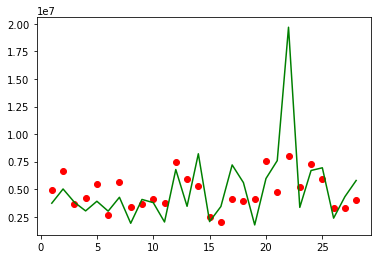

In [23]:
plt.plot(range(1,len(lasso_predictions)+1),lasso_predictions,'ro')
plt.plot(range(1,len(lasso_predictions)+1),y_test,'g')

Writing result to a file

In [31]:
file1 = open("results.txt","a")
file1.write("Linear_Regression "+str(val)+"\n")
file1.close()